

1.   Name : Sachin Yadav
2.   Email Id: sachinrao10397@gmail.com
3.   Contact No : 9667957762


### In this project, I used a CNN model and check the accuracy. As the dataset is less in size, my model is underfit.

### Apart from that I also used a Tranfer Lerning technique on VGG19 model and train the model on the given dataset and get a better accuracy then normal CNN. I also applied a augmentation technique to improve the accuracy of model. Make a model for Materials, Patterns, and Neckline and check the prediction for the given images get a good results.

In [1]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import VGG19, inception_v3, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator

import numpy as np
import os

In [3]:
model = VGG19()

574717952/574710816 [==============================] - 12s 0us/step


In [ ]:
model.summary()

### Lets try to predict the dress using VGG19 model

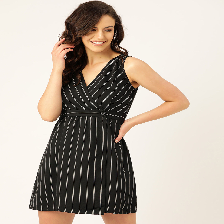

In [11]:
load_img('/content/pic_12.jpg', target_size=(224,224))

In [23]:
imagesize = (224,224)
image = load_img('/content/pic_12.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

miniskirt With 0.8848513 Confidence


### We can check for the first image our model predict the correct dress type i.e., **miniskirt** With **0.8848513** Confidence

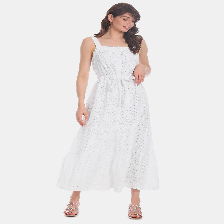

In [24]:
load_img('/content/pic_111.jpg', target_size=(224,224))

In [35]:
imagesize = (224,224)
image = load_img('/content/pic_111.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

gown With 0.18726611 Confidence


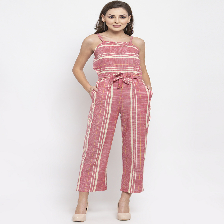

In [30]:
load_img('/content/pic_291.jpg', target_size=(224,224))

In [29]:
imagesize = (224,224)
image = load_img('/content/pic_291.jpg', target_size= imagesize)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
pred = model.predict(image)
pred = imagenet_utils.decode_predictions(pred)
Class = pred[0][0][1]
Conf = pred[0][0][2]
print(Class, "With", Conf, "Confidence")

stole With 0.16670981 Confidence


### Lets try to buillt a own model on the given dataset and try to predict the Material, Pattern and Neckline.




In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, BatchNormalization, Input

import pandas as pd
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/catalogue\ assignment

/content/drive/MyDrive/catalogue assignment


In [6]:
pwd

'/content/drive/MyDrive/catalogue assignment'

In [7]:
df = pd.read_excel('dataset.xlsx')

In [8]:
df.head()

,Title,Description,Material,Pattern,Neckline,Image_Path,Image_Path.1,Unnamed: 7
0,Peach Poly Crepe jumpsuit,This stylish foil print kurta from janasya is ...,Crepe,Printed,Round Neck,/images/pic_0.jpg,/images/pic_0.jpg,pic_0.jpg
1,Light Brown Bias Yoke Checks Top,This check pattern top by Work Label is crafte...,Cotton,Checks,Round Neck,/images/pic_1.jpg,/images/pic_1.jpg,pic_1.jpg
2,Off White Geometric Straight Cotton Dobby Top ...,"Featuring elegant printed details, this off wh...",Viscose,Checks,Round Neck,/images/pic_2.jpg,/images/pic_2.jpg,NaN
3,Blue Me Away Cape Top,Add an extra dose of style to your casual ward...,Polyester,Solid/Plain,V-Neck,/images/pic_3.jpg,/images/pic_3.jpg,NaN
4,Yellow On A High Gown,Yellow polyester georgette maxi dress. Polyest...,Polyester,Solid/Plain,V-Neck,/images/pic_4.jpg,/images/pic_4.jpg,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         500 non-null    object
 1   Description   500 non-null    object
 2   Material      500 non-null    object
 3   Pattern       500 non-null    object
 4   Neckline      500 non-null    object
 5   Image_Path    500 non-null    object
 6   Image_Path.1  500 non-null    object
 7   Unnamed: 7    2 non-null      object
dtypes: object(8)
memory usage: 31.4+ KB


In [10]:
df = df.drop(['Image_Path.1', 'Unnamed: 7'], axis=1)

In [11]:
print('Total Number of Unique value in Material Column:',df.Material.nunique())
print('Total Number of Unique value in Pattern Column:',df.Pattern.nunique())
print('Total Number of Unique value in Neckline Column:', df.Neckline.nunique())

Total Number of Unique value in Material Column: 30
Total Number of Unique value in Pattern Column: 18
Total Number of Unique value in Neckline Column: 22


In [87]:
Materials = np.array(sorted(list(df.Material.unique())))
Materials

array(['Blended Fabric', 'Chiffon', 'Cotton', 'Crepe', 'Crinkled',
       'Denim', 'Georgette', 'Khadi', 'Knitted', 'Lace', 'Leather',
       'Linen', 'Lyocell', 'Modal', 'Net', 'Nylon', 'Organic', 'Organza',
       'Polyamide', 'Polycotton', 'Polyester', 'Poplin', 'Rayon', 'Satin',
       'Sequin', 'Silk', 'Suede', 'Velvet', 'Viscose', 'Wool'],
      dtype='<U14')

In [89]:
Patterns = np.array(sorted(list(df.Pattern.unique())))
Patterns

array(['Animal Print', 'Checks', 'Detailing', 'Embellished/Sequined',
       'Embroidered', 'Floral', 'Geometric', 'Mirror Work', 'Ombre',
       'Patterned', 'Plaid', 'Pleated', 'Polka Dots', 'Printed',
       'Ruffled', 'Solid/Plain', 'Stripes', 'Tie & Dye'], dtype='<U20')

In [90]:
Necklines = np.array(sorted(list(df.Neckline.unique())))
Necklines

array(['Boat Neck', 'Cold Shoulder', 'Collar Neck', 'Cowl Neck',
       'Crew Neck', 'Halter Neck', 'High Neck', 'Hooded', 'Keyhole Neck',
       'Mandarin Neck', 'Off Shoulder', 'One Shoulder', 'Plunging Neck',
       'Queen Anne', 'Round Neck', 'Ruffled Neck', 'Scoop Neck',
       'Shoulder Straps', 'Square Neck', 'Strapless/Tube', 'Sweetheart',
       'V-Neck'], dtype='<U15')

### Seperate the dependent and independent data

In [15]:
data = list(df['Image_Path'])
label_Material = df["Material"]
label_Pattern = df["Pattern"]
label_Neckline = df["Neckline"]

In [16]:
train = []
for imagePath in data:
  image = cv2.imread("."+imagePath)
  image = cv2.resize(image, (224,224))
  image = img_to_array(image)
  train.append(image)

In [17]:
Data = np.array(train)
label_Material = np.array(label_Material)

In [18]:
len(label_Material), len(Data)

(500, 500)

### Train a model to predict the material.

In [19]:
## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Material = lb.fit_transform(label_Material)
Label_Materials = to_categorical(Label_Material)

In [20]:
len(Label_Materials[0])

30

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Data, Label_Materials, test_size=0.25 )

In [22]:
imageGen = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(20, (5,5), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(50, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(500, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

##Outputlayer
model.add(Dense(30, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(imageGen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
12/12 [==============================] - 11s 367ms/step - loss: 146.4503 - accuracy: 0.1618 - val_loss: 1859.7549 - val_accuracy: 0.2880
Epoch 2/50
12/12 [==============================] - 4s 319ms/step - loss: 171.2586 - accuracy: 0.2050 - val_loss: 2163.8633 - val_accuracy: 0.0080
Epoch 3/50
12/12 [==============================] - 4s 320ms/step - loss: 104.3687 - accuracy: 0.2478 - val_loss: 554.7886 - val_accuracy: 0.1440
Epoch 4/50
12/12 [==============================] - 4s 324ms/step - loss: 91.7396 - accuracy: 0.2679 - val_loss: 481.5151 - val_accuracy: 0.0960
Epoch 5/50
12/12 [==============================] - 4s 328ms/step - loss: 90.8535 - accuracy: 0.2189 - val_loss: 128.9599 - val_accuracy: 0.1760
Epoch 6/50
12/12 [==============================] - 4s 325ms/step - loss: 61.9983 - accuracy: 0.2640 - val_loss: 222.3885 - val_accuracy: 0.2720
Epoch 7/50
12/12 [==============================] - 4s 340ms/step - loss: 52.0703 - accuracy: 0.1853 - val_loss: 106.3356 - 

**The Accuracy is not good for our model. Beacuse the size of our dataset is very less.**

### Lets apply a VGG19 Model on our dataset and Try to predict the material from the image with the help of Tranfer Learning.





In [26]:
## Convert the images into the array
Train = []
for imagePath in data:
  image = load_img("."+ imagePath, target_size=(224,224))
  image = img_to_array(image)
  image = preprocess_input(image)
  Train.append(image)

In [27]:
Image_data = np.array(Train)

In [28]:
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Materials, test_size=0.25 )

In [30]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3)))) 

80142336/80134624 [==============================] - 1s 0us/step


In [31]:
basemodel.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [32]:
## Functional API
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(30, activation='softmax')(headmodel)

In [33]:
material_model = Model(inputs= basemodel.input, outputs= headmodel)

In [34]:
## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [ ]:
# material_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print('Model is gong to train..........')
# PMaterial = material_ model.fit_generator(generator.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100)

**We can train our model for both training and testing data. But we have a very small dataset and many materials have only one pic in our datset that will make our data Underfitting as well as overfitting.**

---
**To reduce Underfitting we are using our whole dataset for the training.**


In [35]:
material_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PMaterial = material_model.fit_generator(generator.flow(Image_data, Label_Materials, batch_size=32), epochs=100)

Model is gong to train..........


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
16/16 [==============================] - 6s 302ms/step - loss: 72.7254 - accuracy: 0.1712
Epoch 2/100
16/16 [==============================] - 5s 301ms/step - loss: 27.7748 - accuracy: 0.3273
Epoch 3/100
16/16 [==============================] - 5s 300ms/step - loss: 11.0313 - accuracy: 0.2676
Epoch 4/100
16/16 [==============================] - 5s 298ms/step - loss: 3.9881 - accuracy: 0.2726
Epoch 5/100
16/16 [==============================] - 5s 307ms/step - loss: 3.2635 - accuracy: 0.2886
Epoch 6/100
16/16 [==============================] - 5s 323ms/step - loss: 2.6493 - accuracy: 0.3276
Epoch 7/100
16/16 [==============================] - 5s 315ms/step - loss: 2.4809 - accuracy: 0.3849
Epoch 8/100
16/16 [==============================] - 5s 313ms/step - loss: 2.4116 - accuracy: 0.3935
Epoch 9/100
16/16 [==============================] - 5s 300ms/step - loss: 2.2046 - accuracy: 0.4582
Epoch 10/100
16/16 [==============================] - 5s 313ms/step - loss: 2.3757 - acc

In [102]:
##Lets predict
image = load_img('./images/pic_2.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = material_model.predict(image)
pred

array([[1.2641018e-18, 1.4812258e-07, 1.6611574e-02, 5.9917811e-02,
        5.7133235e-16, 1.2553185e-09, 2.1460095e-05, 5.5108887e-15,
        4.3146418e-05, 5.1892597e-15, 1.0930961e-18, 1.6013593e-09,
        1.1774786e-08, 1.7516619e-09, 9.7918817e-10, 1.5545682e-08,
        3.2731129e-22, 1.0151598e-09, 4.0673514e-15, 1.0790802e-05,
        2.0609492e-01, 8.7787644e-24, 8.4526360e-02, 5.9509244e-07,
        4.0833881e-11, 1.2692946e-13, 1.8096080e-20, 1.5152658e-06,
        6.3277167e-01, 2.5990741e-13]], dtype=float32)

In [103]:
## Predicted class
pred_mat = np.argmax(pred)
ypred = Materials[pred_mat]

## Actual Class
actual = df[df['Image_Path'] == '/images/pic_2.jpg']
yactual = actual.Material.values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Viscose pattern.... and the real class is ['Viscose']


In [104]:
##Lets predict for another image
image = load_img('./images/pic_49.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = material_model.predict(image)
pred

array([[6.5854345e-14, 7.1876508e-07, 1.1447824e-02, 4.2548282e-03,
        6.9239527e-15, 6.0462395e-09, 1.3293510e-05, 8.3617995e-14,
        2.9343297e-05, 3.7057327e-17, 4.9266587e-14, 2.9764356e-06,
        1.4596591e-06, 4.5630929e-07, 4.2368072e-08, 8.7130447e-06,
        5.2827301e-22, 2.9663443e-08, 1.8825368e-08, 9.5331267e-04,
        4.9701074e-01, 3.1822340e-16, 3.3296010e-01, 1.1915033e-07,
        1.8049764e-09, 9.1422833e-12, 8.6095843e-16, 1.4277776e-09,
        1.5331604e-01, 2.5439926e-13]], dtype=float32)

In [106]:
## Predicted class
pred_mat = np.argmax(pred)
ypred = Materials[pred_mat]

## Actual Class
actual = df[df['Image_Path'] == '/images/pic_49.jpg']
yactual = actual.Material.values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Polyester pattern.... and the real class is ['Rayon']


In [141]:
## Save the material model
material_model.save('Material_model.h5')

### Lets try the same above model to predict the Pattern present in the image.

In [39]:
## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Pattern = lb.fit_transform(label_Pattern)
Label_Patterns = to_categorical(Label_Pattern)

In [40]:
len(Label_Patterns[0])

18

In [41]:
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [265]:
# X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Patterns, test_size=0.25 )

In [42]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3)))) 

In [43]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(18, activation='softmax')(headmodel)

## Combine basemodel and headmodel in a single model
pattern_model = Model(inputs= basemodel.input, outputs= headmodel)

In [44]:
## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [224]:
pattern_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PPatterns = pattern_model.fit_generator(generator.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=100)

Model is gong to train..........


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
12/12 [==============================] - 6s 401ms/step - loss: 65.4850 - accuracy: 0.2316 - val_loss: 41.4870 - val_accuracy: 0.4240
Epoch 2/100
12/12 [==============================] - 4s 369ms/step - loss: 32.8938 - accuracy: 0.5375 - val_loss: 30.2185 - val_accuracy: 0.4080
Epoch 3/100
12/12 [==============================] - 5s 376ms/step - loss: 24.5160 - accuracy: 0.5258 - val_loss: 21.2205 - val_accuracy: 0.4720
Epoch 4/100
12/12 [==============================] - 4s 370ms/step - loss: 15.1141 - accuracy: 0.5306 - val_loss: 13.6091 - val_accuracy: 0.5280
Epoch 5/100
12/12 [==============================] - 4s 371ms/step - loss: 7.7149 - accuracy: 0.6493 - val_loss: 10.2982 - val_accuracy: 0.4800
Epoch 6/100
12/12 [==============================] - 5s 378ms/step - loss: 6.6053 - accuracy: 0.5592 - val_loss: 6.8253 - val_accuracy: 0.4880
Epoch 7/100
12/12 [==============================] - 4s 367ms/step - loss: 2.6252 - accuracy: 0.6708 - val_loss: 5.0217 - val_accurac

In [45]:
pattern_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PPattern = pattern_model.fit_generator(generator.flow(Image_data, Label_Patterns, batch_size=32), epochs=100)

Model is gong to train..........


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
16/16 [==============================] - 5s 298ms/step - loss: 79.1379 - accuracy: 0.2431
Epoch 2/100
16/16 [==============================] - 5s 298ms/step - loss: 30.3525 - accuracy: 0.4779
Epoch 3/100
16/16 [==============================] - 5s 299ms/step - loss: 10.9469 - accuracy: 0.5282
Epoch 4/100
16/16 [==============================] - 5s 296ms/step - loss: 4.9651 - accuracy: 0.5576
Epoch 5/100
16/16 [==============================] - 5s 311ms/step - loss: 3.8326 - accuracy: 0.4879
Epoch 6/100
16/16 [==============================] - 5s 300ms/step - loss: 1.8905 - accuracy: 0.5939
Epoch 7/100
16/16 [==============================] - 5s 300ms/step - loss: 2.1221 - accuracy: 0.4924
Epoch 8/100
16/16 [==============================] - 5s 304ms/step - loss: 1.7905 - accuracy: 0.5959
Epoch 9/100
16/16 [==============================] - 5s 292ms/step - loss: 1.7741 - accuracy: 0.5845
Epoch 10/100
16/16 [==============================] - 5s 301ms/step - loss: 1.5759 - acc

In [119]:
## Check the prediction

image = load_img('./images/pic_99.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = pattern_model.predict(image)
pred

array([[1.2150788e-30, 2.7571619e-23, 2.1156658e-17, 1.2301986e-16,
        4.7250459e-19, 1.2336007e-24, 1.3176320e-24, 0.0000000e+00,
        4.9878679e-25, 1.9322758e-16, 0.0000000e+00, 7.2863400e-20,
        7.2781691e-21, 6.6929000e-14, 4.5732005e-13, 1.0000000e+00,
        6.6017899e-22, 0.0000000e+00]], dtype=float32)

In [121]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Patterns[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_99.jpg']
yactual = actual['Pattern'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Solid/Plain pattern.... and the real class is ['Solid/Plain']


In [131]:
## Check the prediction

image = load_img('./images/pic_39.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = pattern_model.predict(image)
pred

array([[2.4806906e-13, 7.5490025e-06, 2.9408242e-05, 2.3496255e-05,
        1.1917627e-03, 1.7136354e-02, 2.7223192e-07, 5.3202300e-09,
        6.1833393e-11, 1.4149218e-06, 3.3586048e-08, 2.1937602e-07,
        7.2781802e-03, 9.7432762e-01, 2.7041349e-12, 3.7578914e-06,
        1.5903987e-07, 2.4401462e-12]], dtype=float32)

In [132]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Patterns[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_39.jpg']
yactual = actual['Pattern'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Printed pattern.... and the real class is ['Printed']


In [140]:
## Save the model
pattern_model.save('Pattern_model.h5')

### Lets try the same above model to predict the Neckline present in the image.

In [49]:
## Convert the labels to the machine understandable form
lb = LabelEncoder()
Label_Neckline = lb.fit_transform(label_Neckline)
Label_Necklines = to_categorical(Label_Neckline)

In [50]:
len(Label_Necklines[0])

22

In [51]:
generator = ImageDataGenerator(rotation_range=30, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='nearest', width_shift_range=0.1)

In [52]:
# X_train, X_test, y_train, y_test = train_test_split(Image_data, Label_Necklines, test_size=0.25 )

In [53]:
### build model using transfer learning with VGG19 dataset

basemodel = VGG19(weights='imagenet', include_top=False, input_tensor=(Input(shape=(224,224,3)))) 

In [54]:
headmodel = basemodel.output    ## it will returns the last layer of our basemodel
headmodel = Flatten()(headmodel)
headmodel = Dense(1024, activation='relu')(headmodel) 
headmodel = Dropout(0.5)(headmodel)
headmodel = Dense(22, activation='softmax')(headmodel)

## Combine basemodel and headmodel in a single model
neckline_model = Model(inputs= basemodel.input, outputs= headmodel)

In [55]:
## We don't want to train our pretrained basemodel VGG19 
for layers in basemodel.layers:  
  layers.trainable = False

In [56]:
neckline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is gong to train..........')
PNeckline = neckline_model.fit_generator(generator.flow(Image_data, Label_Necklines, batch_size=32), epochs=100)

Model is gong to train..........


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
16/16 [==============================] - 5s 296ms/step - loss: 61.3377 - accuracy: 0.1314
Epoch 2/100
16/16 [==============================] - 5s 301ms/step - loss: 29.3260 - accuracy: 0.2632
Epoch 3/100
16/16 [==============================] - 5s 297ms/step - loss: 10.9440 - accuracy: 0.2483
Epoch 4/100
16/16 [==============================] - 5s 300ms/step - loss: 4.0435 - accuracy: 0.2436
Epoch 5/100
16/16 [==============================] - 5s 309ms/step - loss: 2.9519 - accuracy: 0.2662
Epoch 6/100
16/16 [==============================] - 5s 305ms/step - loss: 3.0388 - accuracy: 0.2254
Epoch 7/100
16/16 [==============================] - 5s 301ms/step - loss: 2.9777 - accuracy: 0.2218
Epoch 8/100
16/16 [==============================] - 5s 302ms/step - loss: 3.0997 - accuracy: 0.2638
Epoch 9/100
16/16 [==============================] - 5s 299ms/step - loss: 2.8074 - accuracy: 0.2776
Epoch 10/100
16/16 [==============================] - 5s 303ms/step - loss: 2.6632 - acc

In [59]:
## Check the prediction

image = load_img('./images/pic_99.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = neckline_model.predict(image)
pred

array([[0.07641989, 0.00867034, 0.08442438, 0.01410546, 0.01769494,
        0.03777191, 0.07707424, 0.01926658, 0.04071048, 0.04149117,
        0.05283599, 0.0656744 , 0.02754457, 0.01252226, 0.1066403 ,
        0.01376635, 0.00873786, 0.06234403, 0.06047474, 0.01703551,
        0.02849907, 0.12629554]], dtype=float32)

In [134]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Necklines[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_99.jpg']
yactual = actual['Neckline'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict Queen Anne pattern.... and the real class is ['V-Neck']


In [135]:
## Check the prediction for one more image

image = load_img('./images/pic_349.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

## lets make some prediction on images
pred = neckline_model.predict(image)
pred

array([[1.1244915e-07, 2.1879015e-17, 2.3026510e-05, 2.5042751e-15,
        2.9573699e-09, 4.7244946e-05, 4.9283535e-08, 1.7620569e-09,
        2.8199355e-07, 2.3770165e-03, 1.8548423e-08, 1.6264644e-07,
        3.2114576e-12, 1.5757820e-12, 4.0524764e-04, 4.8900817e-09,
        4.8291246e-15, 3.4079239e-05, 3.6496171e-08, 3.5404565e-15,
        5.7252145e-09, 9.9711275e-01]], dtype=float32)

In [136]:
## Predicted class
pred_pat = np.argmax(pred)
ypred = Necklines[pred_pat]

## Actual class
actual = df[df['Image_Path'] == '/images/pic_349.jpg']
yactual = actual['Neckline'].values

print(f'Our model predict {ypred} pattern.... and the real class is {yactual}')

Our model predict V-Neck pattern.... and the real class is ['V-Neck']


In [139]:
## Save the model
neckline_model.save('Neckline_model.h5')

Try to predict the above categories for external image

In [170]:
# !wget https://m.media-amazon.com/images/I/614qPMvTCRL._UL1500_.jpg -O newimg.jpg
# !wget https://i.pinimg.com/originals/4b/16/31/4b1631e6efc54a7f1fe44982fff89e87.jpg -O newimg2.jpg

--2020-12-22 14:48:43--  https://i.pinimg.com/originals/4b/16/31/4b1631e6efc54a7f1fe44982fff89e87.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.18.14.176, 104.18.15.176, 2a04:4e42:a::84
Connecting to i.pinimg.com (i.pinimg.com)|104.18.14.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76632 (75K) [image/jpeg]
Saving to: ‘newimg2.jpg’

newimg2.jpg         100%[===================>]  74.84K  --.-KB/s    in 0.008s  

2020-12-22 14:48:43 (9.54 MB/s) - ‘newimg2.jpg’ saved [76632/76632]



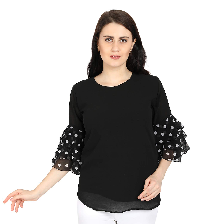

In [162]:
image = load_img('newimg.jpg', target_size=(224,224))
image

In [165]:
## convert the image in machine readable format
image = load_img('newimg.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [168]:
## lets make some prediction on images
pred_mat = material_model.predict(image)
pred_pat = pattern_model.predict(image)
pred_nec = neckline_model.predict(image)


## Predicted class for material
pred_Mat = np.argmax(pred_mat)
pred_Mat = Materials[pred_Mat]
## predicted class for Pattern
pred_Pat = np.argmax(pred_pat)
pred_Pat = Patterns[pred_Pat]
## Predicted class for Neckline
pred_Nec = np.argmax(pred_nec)
pred_Nec = Necklines[pred_Nec]

In [169]:
print(f"Therefore, the Material, Pattern and Necline for the above downloaded image is: {pred_Mat} {pred_Pat} {pred_Nec}")

Therefore, the Material, Pattern and Necline for the above downloaded image is: Cotton Solid/Plain Hooded


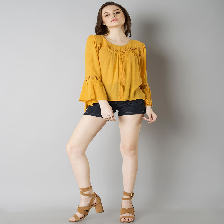

In [171]:
image = load_img('newimg2.jpg', target_size=(224,224))
image

In [172]:
## convert the image in machine readable format
image = load_img('newimg2.jpg', target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [173]:
## lets make some prediction on images
pred_mat = material_model.predict(image)
pred_pat = pattern_model.predict(image)
pred_nec = neckline_model.predict(image)


## Predicted class for material
pred_Mat = np.argmax(pred_mat)
pred_Mat = Materials[pred_Mat]
## predicted class for Pattern
pred_Pat = np.argmax(pred_pat)
pred_Pat = Patterns[pred_Pat]
## Predicted class for Neckline
pred_Nec = np.argmax(pred_nec)
pred_Nec = Necklines[pred_Nec]

In [174]:
print(f"Therefore, the Material, Pattern and Necline for the above downloaded image is: {pred_Mat} {pred_Pat} {pred_Nec}")

Therefore, the Material, Pattern and Necline for the above downloaded image is: Polyester Solid/Plain Shoulder Straps
